# Climate applications for ...

This document has been published for reproducing the application presented in a software paper dedicated to AeroMAPS, submitted to [Journal of Open Aviation Science](https://journals.open.tudelft.nl/joas/index). The different assumptions of this prospective scenario are given in the following. 

An illustrative 2% annual air traffic growth is assumed for the different aviation markets, i.e. lower than trend estimates of around 3%. The impact of COVID-19 is modelled assuming that air traffic returns to 2019 levels in 2024. Concerning the aircraft fleet, an accelerated fleet renewal is assumed with the introduction of 20% more efficient aircraft architectures in 2035. A hydrogen-powered aircraft is more specifically considered for short-range. Operational improvements are also included for reducing fuel consumption, but operational strategies for contrail avoidance are not considered here, even though it is a promising approach. Regarding the replacement of kerosene by drop-in fuels (biofuel and electrofuel here), ReFuelEU targets are considered as blending mandates. Different pathways are considered for the production of biofuel and hydrogen. Electricity production is expected to decarbonise rapidly and strongly, so that CO<sub>2</sub> emissions from electricity-based fuels will be lower than those from kerosene by 2035. On the economic side, several assumptions are made such as median fuel costs or a constant electricity price of 80 €/MWh. Moreover, a carbon price trajectory, based on *Alain Quinet, What Value Do We Attach to Climate Action?, 2019*, is implemented in the form of a tax on the emissions of fossil and alternative fuels.

Moreover, in order to carry out a sustainability assessment, some assumptions are required for setting targets for aviation. A climate target of +1.8°C with a 67% chance of success is chosen as well as a moderate use of Carbon Dioxide Removal (CDR) worldwide. Median estimations are considered for biomass and electricity availability. Finally, concerning allocation rules, a grandfathering approach is assumed for climate issues, which means that 2.6% (i.e. aviation's current share of CO<sub>2</sub> emissions) of the world carbon budget is allocated for aviation. For energy resources, an illustrative and arbitrary allocation of 5% is assumed.

## Load and process

In [1]:
%matplotlib widget
import time
import numpy as np
from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import models_complex, models_complex_improvedgwpstar, models_complex_fair
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
process = AeromapsProcess(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [3]:
# Change end year
process.parameters.end_year = 2100
process.setup()

## Set up variables

### Aviation scenario

In [4]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [2.0]

In [5]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet.categories["Short Range"].parameters.life = 20
fleet.categories["Medium Range"].parameters.life = 20
fleet.categories["Long Range"].parameters.life = 20

In [6]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process.parameters.operations_contrails_final_gain = 59.4  # [%]
process.parameters.operations_contrails_start_year = 2101
process.parameters.operations_contrails_duration = 15.0
process.parameters.operations_contrails_final_overconsumption = 0.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process.parameters.hydrogen_electrolysis_share_reference_years = []
process.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process.parameters.hydrogen_gas_share_reference_years = []
process.parameters.hydrogen_gas_share_reference_years_values = [0]

### Climate parameters

In [9]:
# Climate sensitivity

contrails_choice = "Lee"
nox_choice = "Lee"

# Contrails
## Lee et al.
if contrails_choice == "Lee":
    process.parameters.erf_coefficient_contrails = 1.058e-09
## Digby et al.
elif contrails_choice == "Digby":
    process.parameters.erf_coefficient_contrails = 1.058e-09 * 8 / 57.4

# NOx
## Lee et al.
if nox_choice == "Lee":
    process.parameters.erf_coefficient_nox_short_term_o3_increase = 34.4 * 1.35 * 0.88
    process.parameters.erf_coefficient_nox_long_term_o3_decrease = -9.3 * 1.35 * 0.88 * 0.79
    process.parameters.erf_coefficient_nox_ch4_decrease = -18.7 * 1.35 * 0.88 * 0.79
    process.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = (
        -2.8 * 1.35 * 0.88 * 0.79
    )
## Grewe et al.
elif nox_choice == "Lee":
    process.parameters.erf_coefficient_nox_short_term_o3_increase = 59.0
    process.parameters.erf_coefficient_nox_long_term_o3_decrease = -4.1
    process.parameters.erf_coefficient_nox_ch4_decrease = -12.3
    process.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = -1.5

In [10]:
process.parameters.tcre_coefficient = 0.00045

## Compute

In [11]:
t1 = time.time()
process.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:68: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:68: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:68: UserWarning: Warning Message - Model name: electricity_emission_factor - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, th

Computation time: 3.6 s


## Results

## Plots

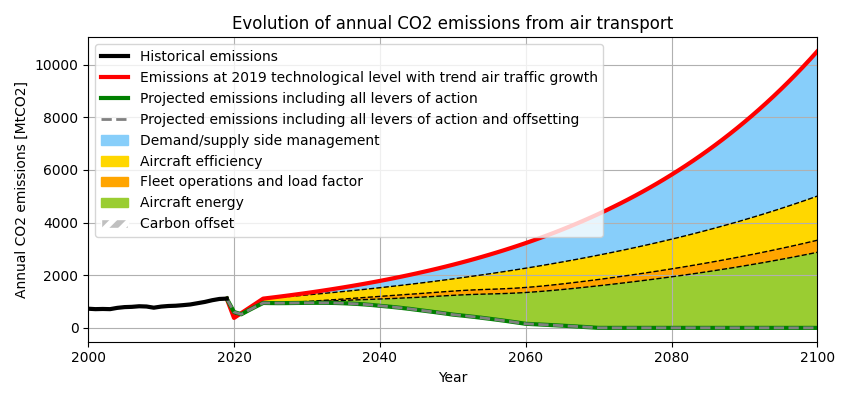

In [12]:
process.plot("air_transport_co2_emissions")

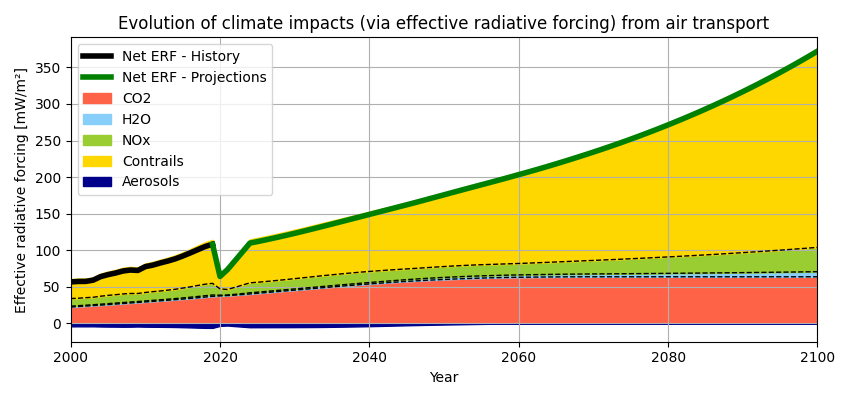

In [13]:
process.plot("air_transport_climate_impacts")

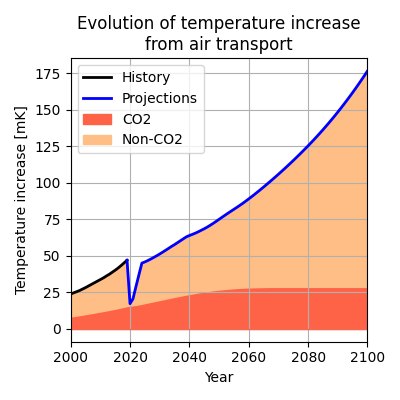

In [14]:
process.plot("temperature_increase_from_air_transport")

In [15]:
process.data["vector_outputs"]["temperature_increase_from_aviation"]

2000    0.023800
2001    0.024600
2002    0.025400
2003    0.026200
2004    0.027200
2005    0.028200
2006    0.029300
2007    0.030400
2008    0.031500
2009    0.032600
2010    0.033700
2011    0.034800
2012    0.036100
2013    0.037300
2014    0.038700
2015    0.040100
2016    0.041600
2017    0.043300
2018    0.045100
2019    0.046900
2020    0.017223
2021    0.020531
2022    0.028857
2023    0.036967
2024    0.044948
2025    0.045766
2026    0.046704
2027    0.047742
2028    0.048849
2029    0.049983
2030    0.051185
2031    0.052442
2032    0.053728
2033    0.055043
2034    0.056381
2035    0.057598
2036    0.058934
2037    0.060282
2038    0.061626
2039    0.062933
2040    0.063821
2041    0.064599
2042    0.065449
2043    0.066381
2044    0.067423
2045    0.068436
2046    0.069573
2047    0.070799
2048    0.072110
2049    0.073483
2050    0.074889
2051    0.076304
2052    0.077705
2053    0.079078
2054    0.080424
2055    0.081750
2056    0.083083
2057    0.084450
2058    0.0858